In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dbo=pd.read_csv("output_training_hTMcdrS.csv")

In [3]:
dbo.head()

,ID,end_of_day_return
0,0,0.964025
1,1,-0.583286
2,2,2.191065
3,3,0.406176
4,4,-0.053764


In [4]:
dbo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745327 entries, 0 to 745326
Data columns (total 2 columns):
ID                   745327 non-null int64
end_of_day_return    745327 non-null float64
dtypes: float64(1), int64(1)
memory usage: 11.4 MB


In [5]:
dbi=pd.read_csv("input_training_CFM.csv")

In [6]:
dbi.head()

,ID,eqt_code,date,09:30:00,09:35:00,09:40:00,09:45:00,09:50:00,09:55:00,10:00:00,...,14:35:00,14:40:00,14:45:00,14:50:00,14:55:00,15:00:00,15:05:00,15:10:00,15:15:00,15:20:00
0,0,975514820,2059277756,0.378421,0.062977,-1.699955,-0.253532,0.317230,-1.394081,-1.338014,...,-0.258339,-0.193950,0.129398,0.064666,0.323250,0.193705,0.387117,0.257687,0.064357,-0.193022
1,1,975514820,661006643,-0.588441,-0.393182,0.918810,0.392393,0.195901,-0.195754,0.000000,...,0.000000,-0.260940,0.000000,-0.130601,0.130666,0.130601,0.130536,0.521881,0.260419,0.910557
2,2,975514820,2252275018,-0.974472,1.789703,-0.105310,-0.456042,0.894337,-0.341168,-0.373679,...,-0.331103,-0.236124,-0.256959,-0.229774,0.063974,-0.570371,0.133774,-0.123741,-0.764930,0.230346
3,3,975514820,901241465,-4.612982,1.746131,1.092367,-0.030626,0.996415,-1.391209,0.169799,...,0.336335,-0.185523,0.521719,-0.095356,-0.207925,0.318842,0.119798,-0.155044,0.290896,-0.058833
4,4,975514820,1213815424,-2.642804,-0.772708,-0.115318,0.145272,-0.136105,0.450894,-0.046230,...,0.631221,0.090185,-0.169416,-0.081212,-0.275152,-0.249646,0.042280,0.483204,0.394914,-0.619209


In [7]:
dbt=pd.read_csv("input_test_CFM.csv")

In [8]:
dbt.head()

,ID,eqt_code,date,09:30:00,09:35:00,09:40:00,09:45:00,09:50:00,09:55:00,10:00:00,...,14:35:00,14:40:00,14:45:00,14:50:00,14:55:00,15:00:00,15:05:00,15:10:00,15:15:00,15:20:00
0,745327,975514820,1187660213,-5.765868,-0.496553,0.852754,-0.354230,0.567489,-0.070792,-0.637290,...,0.566192,0.282522,-0.070559,0.070577,-0.070559,0.282307,-0.211516,0.000000,-0.423354,0.847996
1,745328,975514820,4075379637,-0.118653,-1.064350,1.176763,-1.236418,0.737534,-0.528558,0.273105,...,0.462204,-0.131886,0.127535,-0.019407,0.091653,0.652775,-0.080896,0.154637,0.028959,-0.402765
2,745329,975514820,1509397268,2.129608,2.576919,0.096924,0.038237,0.502499,-0.843588,0.012090,...,0.114274,NaN,-0.013945,0.254572,-0.081304,-0.117928,0.154551,0.084374,-0.048784,0.087395
3,745330,975514820,3930524002,-3.721837,-0.683264,0.160819,0.481751,0.107608,-1.526547,1.173124,...,0.065752,-0.633331,-0.022578,0.366928,-0.492304,-0.115243,0.434085,0.154235,-0.495052,-0.808245
4,745331,975514820,3466359530,-28.674284,1.121113,3.280041,-1.320061,-1.451639,0.581340,-1.300371,...,0.300869,0.333145,0.495460,1.120881,0.198488,0.077289,0.321886,-1.443179,0.454032,0.684609


#### Autant éliminer l'action "1818287812" du training puisqu'elle n'est pas dans le test

In [9]:
dbi['end_of_day_return']=dbo['end_of_day_return']
dbi=dbi[dbi.eqt_code != 1818287812]
dbo=dbi[['ID','end_of_day_return']]
dbi=dbi.drop('end_of_day_return',axis=1)

In [10]:
dbo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 745322 entries, 0 to 745326
Data columns (total 2 columns):
ID                   745322 non-null int64
end_of_day_return    745322 non-null float64
dtypes: float64(1), int64(1)
memory usage: 17.1 MB


In [11]:
745326-745322

4

In [12]:
# on a enlevé une équity, correspondant à 4 lignes (4 dates)

In [13]:
### Pour la classification, il sera utile de disposer des signes de rendements à prévoir
dbo['TARGET']=np.sign(dbo.end_of_day_return)

In [14]:
dbo.TARGET.value_counts()

-1.0    374827
 1.0    370494
 0.0         1
Name: TARGET, dtype: int64

In [15]:
dbo.TARGET[dbo.TARGET==0]=1.0

D:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
dbo.TARGET.value_counts()

-1.0    374827
 1.0    370495
Name: TARGET, dtype: int64

In [17]:
##### Mettons les ID à leur place
dbt=dbt.set_index('ID', drop=True, append=False, inplace=False, verify_integrity=False)
dbi=dbi.set_index('ID', drop=True, append=False, inplace=False, verify_integrity=False)

#### Les NaN sont trop nombreux en test pourqu'on puisse en visager de dropper toutes les colonnes correspondantes. 

In [18]:
# comptons les NaN et les vrais zéros
X_c=dbi.drop(['eqt_code','date'],axis=1)
X_c[X_c==0]=1
dbi['n0']=X_c[X_c==1].sum(axis=1)
dbi['nana']=dbi.isna().sum(axis=1)

In [19]:
# comptons les NaN et les vrais zéros
X_c=dbt.drop(['eqt_code','date'],axis=1)
X_c[X_c==0]=1
dbt['n0']=X_c[X_c==1].sum(axis=1)
dbt['nana']=dbt.isna().sum(axis=1)

In [20]:
# s'agissant de rendements de moyenne quasi nulle, imputer des 0 parait le plus raisonnable
dbt=dbt.fillna(0)
dbi=dbi.fillna(0)

## Feature engineering

In [21]:
from scipy import stats

In [22]:
dbi.head()

,eqt_code,date,09:30:00,09:35:00,09:40:00,09:45:00,09:50:00,09:55:00,10:00:00,10:05:00,...,14:45:00,14:50:00,14:55:00,15:00:00,15:05:00,15:10:00,15:15:00,15:20:00,n0,nana
ID,,,,,,,,,,,,,,,,,,,,,
0,975514820,2059277756,0.378421,0.062977,-1.699955,-0.253532,0.317230,-1.394081,-1.338014,-0.320252,...,0.129398,0.064666,0.323250,0.193705,0.387117,0.257687,0.064357,-0.193022,7.0,0
1,975514820,661006643,-0.588441,-0.393182,0.918810,0.392393,0.195901,-0.195754,0.000000,0.130601,...,0.000000,-0.130601,0.130666,0.130601,0.130536,0.521881,0.260419,0.910557,13.0,0
2,975514820,2252275018,-0.974472,1.789703,-0.105310,-0.456042,0.894337,-0.341168,-0.373679,1.103954,...,-0.256959,-0.229774,0.063974,-0.570371,0.133774,-0.123741,-0.764930,0.230346,0.0,1
3,975514820,901241465,-4.612982,1.746131,1.092367,-0.030626,0.996415,-1.391209,0.169799,-0.827777,...,0.521719,-0.095356,-0.207925,0.318842,0.119798,-0.155044,0.290896,-0.058833,0.0,0
4,975514820,1213815424,-2.642804,-0.772708,-0.115318,0.145272,-0.136105,0.450894,-0.046230,1.186248,...,-0.169416,-0.081212,-0.275152,-0.249646,0.042280,0.483204,0.394914,-0.619209,0.0,0


In [23]:
# calcul d'un Relative Strength index
X_c=dbi.drop('date',axis=1)
X_c=X_c.drop(['eqt_code','n0','nana'],axis=1)
X1=X_c
X1[X1<0]=0
X_c=dbi.drop('date',axis=1)
X_c=X_c.drop(['eqt_code','n0','nana'],axis=1)
X2=X_c
X2[X2>0]=0
dbi['H']=X1.loc[:,:].sum(axis=1)
dbi['B']=X2.loc[:,:].sum(axis=1)
dbi['rs']=dbi['H']/(dbi['H']-dbi['B'])
dbi=dbi.drop(['H','B'],axis=1)
del X1,X2
dbi.isna().sum().sum()

0

In [24]:
dbi.head()

,eqt_code,date,09:30:00,09:35:00,09:40:00,09:45:00,09:50:00,09:55:00,10:00:00,10:05:00,...,14:50:00,14:55:00,15:00:00,15:05:00,15:10:00,15:15:00,15:20:00,n0,nana,rs
ID,,,,,,,,,,,,,,,,,,,,,
0,975514820,2059277756,0.378421,0.062977,-1.699955,-0.253532,0.317230,-1.394081,-1.338014,-0.320252,...,0.064666,0.323250,0.193705,0.387117,0.257687,0.064357,-0.193022,7.0,0,0.368313
1,975514820,661006643,-0.588441,-0.393182,0.918810,0.392393,0.195901,-0.195754,0.000000,0.130601,...,-0.130601,0.130666,0.130601,0.130536,0.521881,0.260419,0.910557,13.0,0,0.580905
2,975514820,2252275018,-0.974472,1.789703,-0.105310,-0.456042,0.894337,-0.341168,-0.373679,1.103954,...,-0.229774,0.063974,-0.570371,0.133774,-0.123741,-0.764930,0.230346,0.0,1,0.502360
3,975514820,901241465,-4.612982,1.746131,1.092367,-0.030626,0.996415,-1.391209,0.169799,-0.827777,...,-0.095356,-0.207925,0.318842,0.119798,-0.155044,0.290896,-0.058833,0.0,0,0.424577
4,975514820,1213815424,-2.642804,-0.772708,-0.115318,0.145272,-0.136105,0.450894,-0.046230,1.186248,...,-0.081212,-0.275152,-0.249646,0.042280,0.483204,0.394914,-0.619209,0.0,0,0.545040


In [25]:
# Ici le calcul d'un indice quotidien
X_c=dbi.drop(['eqt_code','n0','nana','rs'],axis=1)
I_d=X_c.groupby(by="date").mean()
I_d.tail()

,09:30:00,09:35:00,09:40:00,09:45:00,09:50:00,09:55:00,10:00:00,10:05:00,10:10:00,10:15:00,...,14:35:00,14:40:00,14:45:00,14:50:00,14:55:00,15:00:00,15:05:00,15:10:00,15:15:00,15:20:00
date,,,,,,,,,,,,,,,,,,,,,
4280289642,-0.015644,0.006370,0.033115,0.031967,0.036624,0.003042,-0.018755,-0.007242,0.000595,0.015350,...,-0.002124,-0.002369,0.003129,-0.002462,-0.005856,0.000330,0.002017,0.006664,-0.003935,0.003118
4283945491,0.028339,-0.004348,0.005254,-0.003282,0.005591,-0.008276,0.009892,-0.006559,0.001209,0.001699,...,0.002549,-0.000101,-0.004553,0.001298,0.010377,-0.000020,-0.000257,-0.001984,0.003318,0.002940
4286859222,-0.030861,-0.023738,0.004904,-0.003545,-0.013183,0.002150,0.000131,-0.001021,-0.012295,-0.000406,...,-0.005065,-0.001539,-0.008263,0.002514,0.004462,-0.009565,-0.003221,0.004687,0.005384,-0.011523
4291324071,0.009176,0.007082,-0.001477,0.015716,0.006947,0.001629,-0.007996,-0.004813,-0.013780,0.008838,...,0.001685,0.003399,-0.004844,0.002271,-0.001898,-0.003201,-0.004699,0.000109,-0.002540,-0.007431
4292409069,-0.032730,0.020870,0.028255,-0.016726,-0.018421,-0.008534,-0.007937,0.009911,0.007610,0.018566,...,0.009889,-0.004170,0.004516,0.003358,0.005069,0.005330,-0.000202,-0.003911,0.009767,-0.001876


In [26]:
X_c.head()

,date,09:30:00,09:35:00,09:40:00,09:45:00,09:50:00,09:55:00,10:00:00,10:05:00,10:10:00,...,14:35:00,14:40:00,14:45:00,14:50:00,14:55:00,15:00:00,15:05:00,15:10:00,15:15:00,15:20:00
ID,,,,,,,,,,,,,,,,,,,,,
0,2059277756,0.378421,0.062977,-1.699955,-0.253532,0.317230,-1.394081,-1.338014,-0.320252,-0.384785,...,-0.258339,-0.193950,0.129398,0.064666,0.323250,0.193705,0.387117,0.257687,0.064357,-0.193022
1,661006643,-0.588441,-0.393182,0.918810,0.392393,0.195901,-0.195754,0.000000,0.130601,0.261071,...,0.000000,-0.260940,0.000000,-0.130601,0.130666,0.130601,0.130536,0.521881,0.260419,0.910557
2,2252275018,-0.974472,1.789703,-0.105310,-0.456042,0.894337,-0.341168,-0.373679,1.103954,0.587386,...,-0.331103,-0.236124,-0.256959,-0.229774,0.063974,-0.570371,0.133774,-0.123741,-0.764930,0.230346
3,901241465,-4.612982,1.746131,1.092367,-0.030626,0.996415,-1.391209,0.169799,-0.827777,-0.291823,...,0.336335,-0.185523,0.521719,-0.095356,-0.207925,0.318842,0.119798,-0.155044,0.290896,-0.058833
4,1213815424,-2.642804,-0.772708,-0.115318,0.145272,-0.136105,0.450894,-0.046230,1.186248,-0.269528,...,0.631221,0.090185,-0.169416,-0.081212,-0.275152,-0.249646,0.042280,0.483204,0.394914,-0.619209


In [27]:
X_c=dbi.drop('date',axis=1)
X_c=X_c.drop('eqt_code',axis=1)
X_c=X_c.drop('rs',axis=1)
X_c.head()

,09:30:00,09:35:00,09:40:00,09:45:00,09:50:00,09:55:00,10:00:00,10:05:00,10:10:00,10:15:00,...,14:45:00,14:50:00,14:55:00,15:00:00,15:05:00,15:10:00,15:15:00,15:20:00,n0,nana
ID,,,,,,,,,,,,,,,,,,,,,
0,0.378421,0.062977,-1.699955,-0.253532,0.317230,-1.394081,-1.338014,-0.320252,-0.384785,-0.256910,...,0.129398,0.064666,0.323250,0.193705,0.387117,0.257687,0.064357,-0.193022,7.0,0
1,-0.588441,-0.393182,0.918810,0.392393,0.195901,-0.195754,0.000000,0.130601,0.261071,0.130405,...,0.000000,-0.130601,0.130666,0.130601,0.130536,0.521881,0.260419,0.910557,13.0,0
2,-0.974472,1.789703,-0.105310,-0.456042,0.894337,-0.341168,-0.373679,1.103954,0.587386,-1.095339,...,-0.256959,-0.229774,0.063974,-0.570371,0.133774,-0.123741,-0.764930,0.230346,0.0,1
3,-4.612982,1.746131,1.092367,-0.030626,0.996415,-1.391209,0.169799,-0.827777,-0.291823,0.302953,...,0.521719,-0.095356,-0.207925,0.318842,0.119798,-0.155044,0.290896,-0.058833,0.0,0
4,-2.642804,-0.772708,-0.115318,0.145272,-0.136105,0.450894,-0.046230,1.186248,-0.269528,0.196175,...,-0.169416,-0.081212,-0.275152,-0.249646,0.042280,0.483204,0.394914,-0.619209,0.0,0


In [28]:
X_c=X_c.drop(['n0','nana'],axis=1)

In [29]:
# quelques features élémentaires : min, max, somme totale des variations sur la période, somme sur chacune des 3 dernières demi-heures
dbi['min']=X_c.min(axis=1)
dbi['max']=X_c.max(axis=1)
dbi['sum']=X_c.sum(axis=1)
dbi['sum6z']=X_c.loc[:,'14:55:00':'15:20:00'].sum(axis=1)
dbi['sum6y']=X_c.loc[:,'14:25:00':'14:50:00'].sum(axis=1)
dbi['sum6x']=X_c.loc[:,'13:55:00':'14:20:00'].sum(axis=1)

In [30]:
# ecart type, swkeness, kurtosis
dbi['var']=X_c.std(axis=1)
dbi['skew']=X_c.skew(axis=1)
dbi['kurt']=X_c.kurtosis(axis=1)

In [31]:
dbi.head()

,eqt_code,date,09:30:00,09:35:00,09:40:00,09:45:00,09:50:00,09:55:00,10:00:00,10:05:00,...,rs,min,max,sum,sum6z,sum6y,sum6x,var,skew,kurt
ID,,,,,,,,,,,,,,,,,,,,,
0,975514820,2059277756,0.378421,0.062977,-1.699955,-0.253532,0.317230,-1.394081,-1.338014,-0.320252,...,0.368313,-1.699955,0.777374,-5.263628,1.033094,-0.387198,0.323788,0.425006,-1.620724,4.210342
1,975514820,661006643,-0.588441,-0.393182,0.918810,0.392393,0.195901,-0.195754,0.000000,0.130601,...,0.580905,-0.588441,0.918810,2.289185,2.084660,-0.326290,0.065611,0.281643,0.725766,1.776900
2,975514820,2252275018,-0.974472,1.789703,-0.105310,-0.456042,0.894337,-0.341168,-0.373679,1.103954,...,0.502360,-1.095339,1.789703,0.108213,-1.030948,-1.035860,1.230703,0.454548,0.857117,3.018485
3,975514820,901241465,-4.612982,1.746131,1.092367,-0.030626,0.996415,-1.391209,0.169799,-0.827777,...,0.424577,-4.612982,1.746131,-4.423418,0.307734,0.642234,-1.332131,0.730595,-3.352767,21.423994
4,975514820,1213815424,-2.642804,-0.772708,-0.115318,0.145272,-0.136105,0.450894,-0.046230,1.186248,...,0.545040,-2.642804,2.308409,2.643726,-0.223609,0.207068,0.676673,0.604780,-0.434183,6.787049


In [32]:
# calculons des moyennes mobiles exponentielles
a6=2/(1+6)
long=len(X_c.columns)
dbi['ema6']=X_c['09:30:00']
for i in range(1,long):
    dbi['ema6']=a6* X_c.iloc[:,i] + (1-a6)*dbi['ema6']

### de même pour le test

In [33]:
X_c=dbt.drop('date',axis=1)
X_c=X_c.drop(['eqt_code','n0','nana'],axis=1)
X1=X_c
X1[X1<0]=0
X1.head()
X_c=dbt.drop('date',axis=1)
X_c=X_c.drop(['eqt_code','n0','nana'],axis=1)
X2=X_c
X2[X2>0]=0
dbt['H']=X1.loc[:,:].sum(axis=1)
dbt['B']=X2.loc[:,:].sum(axis=1)
dbt['rs']=dbt['H']/(dbt['H']-dbt['B'])
dbt=dbt.drop(['H','B'],axis=1)
del X1,X2
dbt.isna().sum().sum()

0

In [34]:
dbt.head()

,eqt_code,date,09:30:00,09:35:00,09:40:00,09:45:00,09:50:00,09:55:00,10:00:00,10:05:00,...,14:50:00,14:55:00,15:00:00,15:05:00,15:10:00,15:15:00,15:20:00,n0,nana,rs
ID,,,,,,,,,,,,,,,,,,,,,
745327,975514820,1187660213,-5.765868,-0.496553,0.852754,-0.354230,0.567489,-0.070792,-0.637290,-1.561391,...,0.070577,-0.070559,0.282307,-0.211516,0.000000,-0.423354,0.847996,3.0,0,0.442766
745328,975514820,4075379637,-0.118653,-1.064350,1.176763,-1.236418,0.737534,-0.528558,0.273105,-0.334460,...,-0.019407,0.091653,0.652775,-0.080896,0.154637,0.028959,-0.402765,0.0,0,0.501380
745329,975514820,1509397268,2.129608,2.576919,0.096924,0.038237,0.502499,-0.843588,0.012090,-0.475902,...,0.254572,-0.081304,-0.117928,0.154551,0.084374,-0.048784,0.087395,0.0,1,0.528112
745330,975514820,3930524002,-3.721837,-0.683264,0.160819,0.481751,0.107608,-1.526547,1.173124,0.265354,...,0.366928,-0.492304,-0.115243,0.434085,0.154235,-0.495052,-0.808245,0.0,6,0.465059
745331,975514820,3466359530,-28.674284,1.121113,3.280041,-1.320061,-1.451639,0.581340,-1.300371,0.877779,...,1.120881,0.198488,0.077289,0.321886,-1.443179,0.454032,0.684609,0.0,0,0.367963


In [35]:
X_c=dbt.drop('date',axis=1)
X_c=X_c.drop('eqt_code',axis=1)
X_c=X_c.drop('rs',axis=1)
X_c=X_c.drop(['n0','nana'],axis=1)
dbt['min']=X_c.min(axis=1)
dbt['max']=X_c.max(axis=1)
dbt['sum']=X_c.sum(axis=1)
dbt['sum6z']=X_c.loc[:,'14:55:00':'15:20:00'].sum(axis=1)
dbt['sum6y']=X_c.loc[:,'14:25:00':'14:50:00'].sum(axis=1)
dbt['sum6x']=X_c.loc[:,'13:55:00':'14:20:00'].sum(axis=1)
dbt['var']=X_c.std(axis=1)
dbt['skew']=X_c.skew(axis=1)
dbt['kurt']=X_c.kurtosis(axis=1)
# calculons des moyennes mobiles exponentielles
a6=2/(1+6)
long=len(X_c.columns)
dbt['ema6']=X_c['09:30:00']
for i in range(1,long):
    dbt['ema6']=a6* X_c.iloc[:,i] + (1-a6)*dbt['ema6']

In [53]:
dbt.head()

,date,eqt_code,15:20:00,rs,ema6,sum,sum6z,sum6y,var,skew,kurt,n0,nana
ID,,,,,,,,,,,,,
745327,1187660213,70,0.847996,0.442766,0.161610,-3.823397,0.424874,0.424573,0.860599,-4.260199,27.661893,3.0,0
745328,4075379637,70,-0.402765,0.501380,-0.039672,0.075109,0.444363,0.390883,0.575603,-0.550601,2.438220,0.0,0
745329,1509397268,70,0.087395,0.528112,0.037712,1.213230,0.078304,-0.100743,0.510367,2.742460,11.858470,0.0,1
745330,3930524002,70,-0.808245,0.465059,-0.302376,-2.566479,-1.322524,-0.568701,0.771526,-1.381432,6.665425,0.0,6
745331,3466359530,70,0.684609,0.367963,0.193631,-25.464288,0.293125,2.381565,3.660716,-6.708341,52.729288,0.0,0


In [37]:
del X_c

### ne gardons que les nouveaux features (et la date)

In [38]:
dbi=dbi[['date','eqt_code','15:20:00','rs','ema6','sum','sum6z','sum6y','var','skew','kurt','n0','nana']]
dbt=dbt[['date','eqt_code','15:20:00','rs','ema6','sum','sum6z','sum6y','var','skew','kurt','n0','nana']]

In [39]:
dbi.head()

,date,eqt_code,15:20:00,rs,ema6,sum,sum6z,sum6y,var,skew,kurt,n0,nana
ID,,,,,,,,,,,,,
0,2059277756,975514820,-0.193022,0.368313,0.065640,-5.263628,1.033094,-0.387198,0.425006,-1.620724,4.210342,7.0,0
1,661006643,975514820,0.910557,0.580905,0.409276,2.289185,2.084660,-0.326290,0.281643,0.725766,1.776900,13.0,0
2,2252275018,975514820,0.230346,0.502360,-0.154598,0.108213,-1.030948,-1.035860,0.454548,0.857117,3.018485,0.0,1
3,901241465,975514820,-0.058833,0.424577,0.053820,-4.423418,0.307734,0.642234,0.730595,-3.352767,21.423994,0.0,0
4,1213815424,975514820,-0.619209,0.545040,-0.046576,2.643726,-0.223609,0.207068,0.604780,-0.434183,6.787049,0.0,0


### Ajoutons des moyennes par date et ratios

In [40]:
Z_N=dbi.groupby(by="date").mean()
Z_P=dbi.groupby(by="date").std()
# il pourait être utile de mémoriser le nombre d'Equity par date (il n'est pas constant)
Z_N['Neq']=dbi.date.value_counts()

In [41]:
Z_N.tail()

,eqt_code,15:20:00,rs,ema6,sum,sum6z,sum6y,var,skew,kurt,n0,nana,Neq
date,,,,,,,,,,,,,
4280289642,2.127546e+09,0.003118,0.501245,0.000919,0.081956,0.002339,0.009631,0.556686,0.099200,5.760382,0.000000,0.102000,500
4283945491,2.120168e+09,0.002940,0.499793,0.001708,0.042002,0.014375,-0.000500,0.456574,-0.011182,5.612661,0.000000,0.372233,497
4286859222,2.054754e+09,-0.011523,0.498044,-0.002527,-0.016001,-0.009777,-0.011416,0.547224,-0.017867,4.977515,0.000000,0.989627,482
4291324071,2.073024e+09,-0.007431,0.492465,-0.003362,-0.109479,-0.019660,0.007494,0.486781,-0.049874,5.727113,0.000000,1.074534,483
4292409069,2.120425e+09,-0.001876,0.499908,0.001955,-0.004867,0.014176,0.026341,0.563771,0.025709,7.344529,0.008032,0.168675,498


In [42]:
Z_N['StSum']=Z_P['sum']
Z_N['St6S']=Z_P['sum6z']
Z_N['Stlast']=Z_P['15:20:00']
#Z_N=Z_N[['StSum','St6S','Stlast','sum','ema6','sum6z','15:20:00','var','n0','nana','Neq','rs','skew','kurt','HB','I71']]
Z_N=Z_N[['StSum','St6S','Stlast','sum','ema6','sum6z','15:20:00','var','n0','nana','Neq','rs','skew','kurt']]
Z_N['Mrs']=Z_N['rs']
Z_N['Mskew']=Z_N['skew']
Z_N['Mkurt']=Z_N['kurt']
Z_N['Srs']=Z_P['rs']
Z_N['Sskew']=Z_P['skew']
Z_N['Skurt']=Z_P['kurt']
Z_N['MSum']=Z_N['sum']
Z_N['M6S']=Z_N['sum6z']
Z_N['Mlast']=Z_N['15:20:00']
Z_N['Mvar']=Z_N['var']
Z_N['Stema']=Z_P['ema6']
Z_N['Mema']=Z_N['ema6']
Z_N['rn0']=Z_N['n0']
Z_N['rnana']=Z_N['nana']
Z_N=Z_N.drop(['ema6','n0','nana'],axis=1)
Z_N=Z_N.drop(['var','sum','sum6z','15:20:00'],axis=1)
Z_N=Z_N.drop('rs',axis=1)
Z_N=Z_N.drop('skew',axis=1)
Z_N=Z_N.drop('kurt',axis=1)
del Z_P
Z_N.tail()

,StSum,St6S,Stlast,Neq,Mrs,Mskew,Mkurt,Srs,Sskew,Skurt,MSum,M6S,Mlast,Mvar,Stema,Mema,rn0,rnana
date,,,,,,,,,,,,,,,,,,
4280289642,5.411270,0.805421,0.331676,500,0.501245,0.099200,5.760382,0.083090,1.633280,8.373591,0.081956,0.002339,0.003118,0.556686,0.145450,0.000919,0.000000,0.102000
4283945491,3.753286,0.687593,0.309866,497,0.499793,-0.011182,5.612661,0.075792,1.550892,7.900500,0.042002,0.014375,0.002940,0.456574,0.110452,0.001708,0.000000,0.372233
4286859222,5.675664,0.809275,0.360386,482,0.498044,-0.017867,4.977515,0.080241,1.382781,7.347825,-0.016001,-0.009777,-0.011523,0.547224,0.129569,-0.002527,0.000000,0.989627
4291324071,4.474343,0.738075,0.278163,483,0.492465,-0.049874,5.727113,0.079067,1.542453,8.755313,-0.109479,-0.019660,-0.007431,0.486781,0.118251,-0.003362,0.000000,1.074534
4292409069,4.028881,0.793891,0.376726,498,0.499908,0.025709,7.344529,0.069595,1.841292,9.596879,-0.004867,0.014176,-0.001876,0.563771,0.139434,0.001955,0.008032,0.168675


#### ajoutons les dans le dataframe du train

In [43]:
dbi=dbi.reset_index()
Z_N=Z_N.reset_index()
dbi=pd.merge(dbi,Z_N,how='left',on='date')
dbi.tail()

,ID,date,eqt_code,15:20:00,rs,ema6,sum,sum6z,sum6y,var,...,Sskew,Skurt,MSum,M6S,Mlast,Mvar,Stema,Mema,rn0,rnana
745317,745322,3279184375,3926613098,0.249705,0.592509,0.087044,3.266659,0.646186,-1.286117,0.363186,...,1.583101,8.311965,-0.039147,0.007382,0.004308,0.525175,0.125016,0.000608,0.0,0.437751
745318,745323,3769890470,3926613098,0.333041,0.485929,0.044008,-0.425094,-0.171913,-0.107136,0.311394,...,1.413729,6.631004,-0.072049,0.013889,-0.006509,0.475565,0.116463,0.000632,0.0,0.032129
745319,745324,2587824610,3926613098,-0.136309,0.386849,0.037924,-6.652508,0.476635,0.099508,0.588480,...,2.084267,11.311972,0.091786,-0.014094,0.000940,0.599864,0.133430,-0.001139,0.0,0.182731
745320,745325,3435022354,3926613098,0.063443,0.550390,0.074564,2.356849,0.370923,1.766076,0.463627,...,1.564312,7.891979,-0.120841,0.015990,0.009809,0.603804,0.161950,0.003681,0.0,0.228916
745321,745326,2299468022,3926613098,-0.081100,0.473530,-0.063467,-1.127254,-0.879649,1.180612,0.410958,...,1.660774,8.323989,-0.148465,0.008100,-0.005708,0.570502,0.130097,-0.000544,0.0,0.339357


##### ajoutons des ratios

In [44]:
dbi['Rlast']=(dbi['15:20:00']-dbi['Mlast'])/dbi['Stlast']
dbi['RS6']=(dbi['sum6z']-dbi['M6S'])/dbi['St6S']
dbi['Rsum']=(dbi['sum']-dbi['MSum'])/dbi['StSum']
dbi['Rema']=(dbi['ema6']-dbi['Mema'])/dbi['Stema']
dbi['Rrs']=(dbi['rs']-dbi['Mrs'])/dbi['Srs']
dbi['Rskew']=(dbi['skew']-dbi['Mskew'])/dbi['Sskew']
dbi['Rkurt']=(dbi['kurt']-dbi['Mkurt'])/dbi['Skurt']

In [45]:
dbi=dbi.set_index('ID', drop=True, append=False, inplace=False, verify_integrity=False)

### Mettons les eqt_code en format numerique (c'est nécessaire pour un bon traitement par Lgbm)

In [46]:
for val in dbi.eqt_code.unique():
            dbi['eqt_code'][dbi['eqt_code']==val]=i
            dbt['eqt_code'][dbt['eqt_code']==val]=i
            i=i+1

D:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Séparons en training et validation

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [48]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import lightgbm as lgb

In [49]:
dbo.columns

Index(['ID', 'end_of_day_return', 'TARGET'], dtype='object')

### pour se mettre dans les conditions du test, nous séparons les dates entre training et validation

In [50]:
# pour se mettre dans les conditions du test, nous séparons les dates entre training et validation
ndate=dbi.date.unique()

In [51]:
dbi.columns

Index(['date', 'eqt_code', '15:20:00', 'rs', 'ema6', 'sum', 'sum6z', 'sum6y',
       'var', 'skew', 'kurt', 'n0', 'nana', 'StSum', 'St6S', 'Stlast', 'Neq',
       'Mrs', 'Mskew', 'Mkurt', 'Srs', 'Sskew', 'Skurt', 'MSum', 'M6S',
       'Mlast', 'Mvar', 'Stema', 'Mema', 'rn0', 'rnana', 'Rlast', 'RS6',
       'Rsum', 'Rema', 'Rrs', 'Rskew', 'Rkurt'],
      dtype='object')

In [80]:
# construisons un tableau pour afficher les résultats
CFM=pd.DataFrame(
      {'Lgbm4' : [0,0,0,0]
        },
    index=[7,42,210,666] )
CFM=CFM.T
CFM

,7,42,210,666
Lgbm4,0,0,0,0


In [81]:
for random_state in [7,42,210,666]:
    #tirons au hasard les dates retenues
    n_train, n_val =train_test_split(ndate,random_state=random_state)
    l_train=n_train.tolist()
    l_val=n_val.tolist()
    # construisons les échantillons en fonction de ces dates
    Z=dbi
    Z['end_of_day_return']=dbo['end_of_day_return']
    Z['TARGET']=dbo['TARGET']
    X_train=Z[Z.date.isin(l_train)]
    X_val=Z[Z.date.isin(l_val)]
    y_train=X_train.end_of_day_return
    y_val=X_val.end_of_day_return
    y_t=X_train.TARGET
    
     
    
    y_v=X_val.TARGET
    
    X_train=X_train.drop('end_of_day_return',axis=1)
    X_val=X_val.drop('end_of_day_return',axis=1)
    X_train=X_train.drop('TARGET',axis=1)
    X_val=X_val.drop('TARGET',axis=1)

    
      
    
    X_t1=X_train[['sum','eqt_code','Rema','Rsum','Neq','var','rn0']]
    X_v1=X_val[['sum','eqt_code','Rema','Rsum','Neq','var','rn0']]
    

    model='Lgbm4'
    gbl = lgb.LGBMClassifier(boosting_type='gbdt',minchildsamples=25,max_depth= 4,learning_rate=0.04,
                             subsample_freq= 1,min_data_in_leaf=100, num_leaves=50,reg_lamda=0.05,
                             colsample_bytree= 0.8,subsample= 0.9,n_estimators=100)
    gbl.fit(X_t1, y_t,categorical_feature=['eqt_code'])
    
    print(); 
    y_r1 = gbl.predict(X_v1)  
    y_p1 = gbl.predict(X_t1)
    roc_test=roc_auc_score(y_v, y_r1)
    print('model=',model)
    print('for sklearn implementation of LightGBM Gradient Boosting') 
    print("score CFM sur le train=",((y_p1 > 0) == (y_t > 0)).mean())
    print("roc_auc_score on test set is {:.3f}".format(roc_test))
    print("score CFM=",((y_v > 0) == (y_r1 > 0)).mean())
    CFM.loc[model,random_state]=((y_v > 0) == (y_r1 > 0)).mean()
    
    
    
    model='Lgbm5'
    gbl = lgb.LGBMClassifier(boosting_type='gbdt',minchildsamples=25,max_depth= 5,learning_rate=0.04,
                             subsample_freq= 1,min_data_in_leaf=100, num_leaves=50,reg_lamda=0.05,
                             colsample_bytree= 0.8,subsample= 0.9,n_estimators=100)
    gbl.fit(X_t1, y_t,categorical_feature=['eqt_code'])
    
    print(); 
    y_r1 = gbl.predict(X_v1)  
    y_p1 = gbl.predict(X_t1)
    roc_test=roc_auc_score(y_v, y_r1)
    print('model=',model)
    print('for sklearn implementation of LightGBM Gradient Boosting') 
    print("score CFM sur le train=",((y_p1 > 0) == (y_t > 0)).mean())
    print("roc_auc_score on test set is {:.3f}".format(roc_test))
    print("score CFM=",((y_v > 0) == (y_r1 > 0)).mean())
    CFM.loc[model,random_state]=((y_v > 0) == (y_r1 > 0)).mean()

    
    model='Lgbm6'
    gbl = lgb.LGBMClassifier(boosting_type='gbdt',minchildsamples=25,max_depth= 6,learning_rate=0.04,
                             subsample_freq= 1,min_data_in_leaf=100, num_leaves=50,reg_lamda=0.05,
                             colsample_bytree= 0.8,subsample= 0.9,n_estimators=100)
    gbl.fit(X_t1, y_t,categorical_feature=['eqt_code'])
    
    print(); 
    y_r1 = gbl.predict(X_v1)  
    y_p1 = gbl.predict(X_t1)
    roc_test=roc_auc_score(y_v, y_r1)
    print('model=',model)
    print('for sklearn implementation of LightGBM Gradient Boosting') 
    print("score CFM sur le train=",((y_p1 > 0) == (y_t > 0)).mean())
    print("roc_auc_score on test set is {:.3f}".format(roc_test))
    print("score CFM=",((y_v > 0) == (y_r1 > 0)).mean())
    CFM.loc[model,random_state]=((y_v > 0) == (y_r1 > 0)).mean()
    
    

D:\Users\pc\Anaconda3\lib\site-packages\lightgbm\basic.py:1038: UserWarning: categorical_feature in Dataset is overridden. New categorical_feature is ['eqt_code']
  warnings.warn('categorical_feature in Dataset is overridden. New categorical_feature is {}'.format(sorted(list(categorical_feature))))



model= Lgbm4
for sklearn implementation of LightGBM Gradient Boosting
score CFM sur le train= 0.537545872708153
roc_auc_score on test set is 0.527
score CFM= 0.5269436954116219


D:\Users\pc\Anaconda3\lib\site-packages\lightgbm\basic.py:1038: UserWarning: categorical_feature in Dataset is overridden. New categorical_feature is ['eqt_code']
  warnings.warn('categorical_feature in Dataset is overridden. New categorical_feature is {}'.format(sorted(list(categorical_feature))))



model= Lgbm5
for sklearn implementation of LightGBM Gradient Boosting
score CFM sur le train= 0.5413516084956613
roc_auc_score on test set is 0.527
score CFM= 0.5272498737685721


D:\Users\pc\Anaconda3\lib\site-packages\lightgbm\basic.py:1038: UserWarning: categorical_feature in Dataset is overridden. New categorical_feature is ['eqt_code']
  warnings.warn('categorical_feature in Dataset is overridden. New categorical_feature is {}'.format(sorted(list(categorical_feature))))



model= Lgbm6
for sklearn implementation of LightGBM Gradient Boosting
score CFM sur le train= 0.5455418523632045
roc_auc_score on test set is 0.526
score CFM= 0.5263796826488188


D:\Users\pc\Anaconda3\lib\site-packages\lightgbm\basic.py:1038: UserWarning: categorical_feature in Dataset is overridden. New categorical_feature is ['eqt_code']
  warnings.warn('categorical_feature in Dataset is overridden. New categorical_feature is {}'.format(sorted(list(categorical_feature))))



model= Lgbm4
for sklearn implementation of LightGBM Gradient Boosting
score CFM sur le train= 0.5373810375670841
roc_auc_score on test set is 0.526
score CFM= 0.5260570410364852


D:\Users\pc\Anaconda3\lib\site-packages\lightgbm\basic.py:1038: UserWarning: categorical_feature in Dataset is overridden. New categorical_feature is ['eqt_code']
  warnings.warn('categorical_feature in Dataset is overridden. New categorical_feature is {}'.format(sorted(list(categorical_feature))))



model= Lgbm5
for sklearn implementation of LightGBM Gradient Boosting
score CFM sur le train= 0.5413434704830054
roc_auc_score on test set is 0.527
score CFM= 0.5272270585330772


D:\Users\pc\Anaconda3\lib\site-packages\lightgbm\basic.py:1038: UserWarning: categorical_feature in Dataset is overridden. New categorical_feature is ['eqt_code']
  warnings.warn('categorical_feature in Dataset is overridden. New categorical_feature is {}'.format(sorted(list(categorical_feature))))



model= Lgbm6
for sklearn implementation of LightGBM Gradient Boosting
score CFM sur le train= 0.5462915921288014
roc_auc_score on test set is 0.527
score CFM= 0.5270499457927673


D:\Users\pc\Anaconda3\lib\site-packages\lightgbm\basic.py:1038: UserWarning: categorical_feature in Dataset is overridden. New categorical_feature is ['eqt_code']
  warnings.warn('categorical_feature in Dataset is overridden. New categorical_feature is {}'.format(sorted(list(categorical_feature))))



model= Lgbm4
for sklearn implementation of LightGBM Gradient Boosting
score CFM sur le train= 0.5365377701541285
roc_auc_score on test set is 0.530
score CFM= 0.5305917537840348


D:\Users\pc\Anaconda3\lib\site-packages\lightgbm\basic.py:1038: UserWarning: categorical_feature in Dataset is overridden. New categorical_feature is ['eqt_code']
  warnings.warn('categorical_feature in Dataset is overridden. New categorical_feature is {}'.format(sorted(list(categorical_feature))))



model= Lgbm5
for sklearn implementation of LightGBM Gradient Boosting
score CFM sur le train= 0.5405962305863751
roc_auc_score on test set is 0.530
score CFM= 0.5301783154266201


D:\Users\pc\Anaconda3\lib\site-packages\lightgbm\basic.py:1038: UserWarning: categorical_feature in Dataset is overridden. New categorical_feature is ['eqt_code']
  warnings.warn('categorical_feature in Dataset is overridden. New categorical_feature is {}'.format(sorted(list(categorical_feature))))



model= Lgbm6
for sklearn implementation of LightGBM Gradient Boosting
score CFM sur le train= 0.5453773080369679
roc_auc_score on test set is 0.529
score CFM= 0.5288628297439367


D:\Users\pc\Anaconda3\lib\site-packages\lightgbm\basic.py:1038: UserWarning: categorical_feature in Dataset is overridden. New categorical_feature is ['eqt_code']
  warnings.warn('categorical_feature in Dataset is overridden. New categorical_feature is {}'.format(sorted(list(categorical_feature))))



model= Lgbm4
for sklearn implementation of LightGBM Gradient Boosting
score CFM sur le train= 0.5369521311897705
roc_auc_score on test set is 0.529
score CFM= 0.5289375519952768


D:\Users\pc\Anaconda3\lib\site-packages\lightgbm\basic.py:1038: UserWarning: categorical_feature in Dataset is overridden. New categorical_feature is ['eqt_code']
  warnings.warn('categorical_feature in Dataset is overridden. New categorical_feature is {}'.format(sorted(list(categorical_feature))))



model= Lgbm5
for sklearn implementation of LightGBM Gradient Boosting
score CFM sur le train= 0.5405871482825797
roc_auc_score on test set is 0.529
score CFM= 0.5296030915385235


D:\Users\pc\Anaconda3\lib\site-packages\lightgbm\basic.py:1038: UserWarning: categorical_feature in Dataset is overridden. New categorical_feature is ['eqt_code']
  warnings.warn('categorical_feature in Dataset is overridden. New categorical_feature is {}'.format(sorted(list(categorical_feature))))



model= Lgbm6
for sklearn implementation of LightGBM Gradient Boosting
score CFM sur le train= 0.5451541751713306
roc_auc_score on test set is 0.529
score CFM= 0.5292542200037571


In [83]:
# sept (sum, eqt_code, Rema, Rsum, Neq, var,rn)
CFM['moyenne']=CFM.mean(axis=1)
CFM

,7,42,210,666,moyenne
Lgbm4,0.526944,0.526057,0.530592,0.528938,0.528133
Lgbm5,0.527250,0.527227,0.530178,0.529603,0.528565
Lgbm6,0.526380,0.527050,0.528863,0.529254,0.527887


In [73]:
# adapted from Muller & Guido 
# https://github.com/amueller/introduction_to_ml_with_python/blob/master/02-supervised-learning.ipynb

def plot_feature_importances(model, Frame):
    plt.clf()
    n_features=len(Frame.columns)
    plt.figure(figsize=(15,15))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), Frame.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)


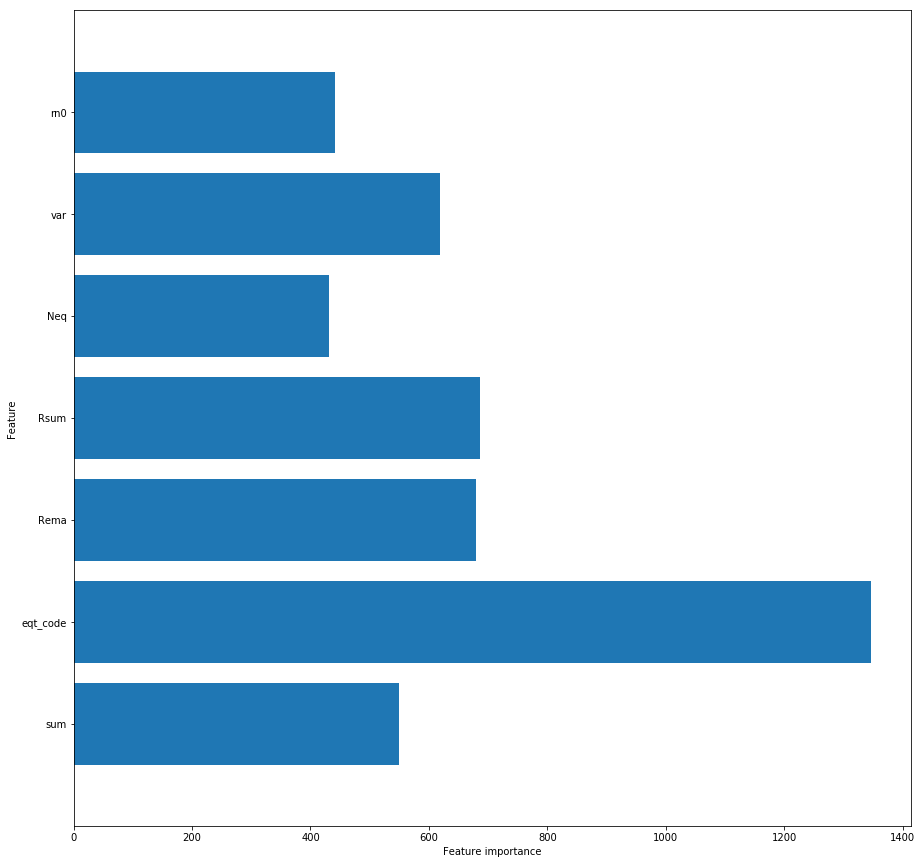

In [74]:
plt.close()
new_fig=plot_feature_importances(gbl,X_t1)
plt.show()

# passons à la prévision pour le test

## fittons le modèle sur l'ensemble des données de train

In [58]:
dbi.columns

Index(['date', 'eqt_code', '15:20:00', 'rs', 'ema6', 'sum', 'sum6z', 'sum6y',
       'var', 'skew', 'kurt', 'n0', 'nana', 'StSum', 'St6S', 'Stlast', 'Neq',
       'Mrs', 'Mskew', 'Mkurt', 'Srs', 'Sskew', 'Skurt', 'MSum', 'M6S',
       'Mlast', 'Mvar', 'Stema', 'Mema', 'rn0', 'rnana', 'Rlast', 'RS6',
       'Rsum', 'Rema', 'Rrs', 'Rskew', 'Rkurt', 'end_of_day_return', 'TARGET'],
      dtype='object')

In [59]:
dbil=dbi[['sum', 'eqt_code', 'Rema', 'Rsum', 'Neq', 'var','rn0']]

#### le meilleur résultat en crossvalidation est obtenu avec max_depth= 5. Il peut être intéressant cependant d'essayer d'ajouter un degré de liberté quand nous recalibrons sur l'échantillon entier. En effet nous avons plus de données à notre disposition, le risque d'overfit est ici un peu moins grand. Nous essayons donc ici avec max_depth = 6.

In [60]:
gbl = lgb.LGBMClassifier(boosting_type='gbdt',minchildsamples=25,max_depth= 6,learning_rate=0.04,
                             subsample_freq= 1,min_data_in_leaf=100, num_leaves=50,reg_lamda=0.05,
                             colsample_bytree= 0.8,subsample= 0.9,n_estimators=100)
gbl.fit(dbil, dbo.TARGET,categorical_feature=['eqt_code'])

y_fit = gbl.predict(dbil)
print("Fit score CFM=",((y_fit > 0) == (dbo.TARGET > 0)).mean())   



D:\Users\pc\Anaconda3\lib\site-packages\lightgbm\basic.py:1038: UserWarning: categorical_feature in Dataset is overridden. New categorical_feature is ['eqt_code']
  warnings.warn('categorical_feature in Dataset is overridden. New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Fit score CFM= 0.5432054870244002


## Complétons les features du dataframe de test

In [61]:
dbt.columns

Index(['date', 'eqt_code', '15:20:00', 'rs', 'ema6', 'sum', 'sum6z', 'sum6y',
       'var', 'skew', 'kurt', 'n0', 'nana'],
      dtype='object')

### sum, eqt_code et var sont présents. Rema, Rsum, Neq et rn0 doivent être calculés

In [62]:
Z_N=dbt.groupby(by="date").mean()
Z_P=dbt.groupby(by="date").std()
Z_N['StSum']=Z_P['sum']
Z_N['St6S']=Z_P['sum6z']
Z_N['Stlast']=Z_P['15:20:00']
Z_N=Z_N[['StSum','St6S','Stlast','sum','ema6','sum6z','15:20:00','var','n0']]
Z_N['MSum']=Z_N['sum']
Z_N['M6S']=Z_N['sum6z']
Z_N['Mlast']=Z_N['15:20:00']
Z_N['Mvar']=Z_N['var']
Z_N['Stema']=Z_P['ema6']
Z_N['Mema']=Z_N['ema6']
Z_N['rn0']=Z_N['n0']
Z_N=Z_N.drop('var',axis=1)
Z_N=Z_N.drop('sum',axis=1)
Z_N=Z_N.drop('sum6z',axis=1)
Z_N=Z_N.drop('15:20:00',axis=1)
Z_N=Z_N.drop('ema6',axis=1)
Z_N=Z_N.drop('n0',axis=1)
del Z_P
Z_N.tail()

,StSum,St6S,Stlast,MSum,M6S,Mlast,Mvar,Stema,Mema,rn0
date,,,,,,,,,,
4282649218,5.263474,0.718961,0.281321,0.116168,0.009297,0.004532,0.486577,0.115375,0.002041,0.000000
4284846807,3.835919,0.754809,0.333255,-0.075950,-0.030762,-0.018873,0.492149,0.130887,-0.007033,0.014085
4286280627,4.868198,0.640722,0.252593,-0.117083,0.004075,-0.004868,0.502994,0.101308,-0.001151,0.049180
4290858265,8.105561,0.703325,0.329494,-0.011643,0.001270,0.003058,0.567987,0.126141,0.000980,0.000000
4293039031,3.925537,0.604091,0.244981,0.010357,-0.004574,0.002183,0.450884,0.100842,0.000044,0.000000


In [63]:
Z_N['Neq']=dbt.date.value_counts()

In [64]:
dbt=dbt.reset_index()
Z_N=Z_N.reset_index()
dbt=pd.merge(dbt,Z_N,how='left',on='date')
dbt.tail()

,ID,date,eqt_code,15:20:00,rs,ema6,sum,sum6z,sum6y,var,...,St6S,Stlast,MSum,M6S,Mlast,Mvar,Stema,Mema,rn0,Neq
319764,1065091,3977320525,748,0.014172,0.406650,0.012292,-4.404438,0.161411,-1.130646,0.516695,...,0.751852,0.313730,0.041905,-0.006569,0.004396,0.523170,0.128795,-0.000796,0.030060,499
319765,1065092,3548746336,748,-0.102210,0.538639,0.001495,1.194092,0.006601,0.159761,0.316473,...,0.580632,0.240493,-0.001220,0.005324,0.001915,0.496034,0.100815,0.000378,0.016097,497
319766,1065093,3397533972,748,0.135065,0.565005,0.139646,2.466045,0.742426,0.413940,0.362551,...,0.678607,0.320274,-0.016859,-0.031845,-0.017024,0.500834,0.129920,-0.008059,0.020080,498
319767,1065094,4284846807,748,0.065293,0.519068,-0.031600,0.648705,-0.501718,0.395880,0.396594,...,0.754809,0.333255,-0.075950,-0.030762,-0.018873,0.492149,0.130887,-0.007033,0.014085,497
319768,1065095,3498292763,748,-0.338074,0.529013,-0.171553,1.006707,-0.616910,-0.077508,0.353068,...,0.685108,0.307550,0.065377,0.018583,0.005405,0.504557,0.112818,0.003301,0.000000,497


In [65]:
dbt['Rlast']=(dbt['15:20:00']-dbt['Mlast'])/dbt['Stlast']
dbt['RS6']=(dbt['sum6z']-dbt['M6S'])/dbt['St6S']
dbt['Rsum']=(dbt['sum']-dbt['MSum'])/dbt['StSum']
dbt['Rema']=(dbt['ema6']-dbt['Mema'])/dbt['Stema']
dbt=dbt.set_index('ID', drop=True, append=False, inplace=False, verify_integrity=False)
dbt.tail()

,date,eqt_code,15:20:00,rs,ema6,sum,sum6z,sum6y,var,skew,...,Mlast,Mvar,Stema,Mema,rn0,Neq,Rlast,RS6,Rsum,Rema
ID,,,,,,,,,,,,,,,,,,,,,
1065091,3977320525,748,0.014172,0.406650,0.012292,-4.404438,0.161411,-1.130646,0.516695,0.888375,...,0.004396,0.523170,0.128795,-0.000796,0.030060,499,0.031162,0.223421,-0.988839,0.101619
1065092,3548746336,748,-0.102210,0.538639,0.001495,1.194092,0.006601,0.159761,0.316473,-0.281121,...,0.001915,0.496034,0.100815,0.000378,0.016097,497,-0.432963,0.002199,0.257589,0.011079
1065093,3397533972,748,0.135065,0.565005,0.139646,2.466045,0.742426,0.413940,0.362551,-0.214816,...,-0.017024,0.500834,0.129920,-0.008059,0.020080,498,0.474873,1.140972,0.569773,1.136888
1065094,4284846807,748,0.065293,0.519068,-0.031600,0.648705,-0.501718,0.395880,0.396594,2.396449,...,-0.018873,0.492149,0.130887,-0.007033,0.014085,497,0.252557,-0.623940,0.188913,-0.187697
1065095,3498292763,748,-0.338074,0.529013,-0.171553,1.006707,-0.616910,-0.077508,0.353068,0.006308,...,0.005405,0.504557,0.112818,0.003301,0.000000,497,-1.116823,-0.927582,0.239219,-1.549876


In [66]:
dbt.columns

Index(['date', 'eqt_code', '15:20:00', 'rs', 'ema6', 'sum', 'sum6z', 'sum6y',
       'var', 'skew', 'kurt', 'n0', 'nana', 'StSum', 'St6S', 'Stlast', 'MSum',
       'M6S', 'Mlast', 'Mvar', 'Stema', 'Mema', 'rn0', 'Neq', 'Rlast', 'RS6',
       'Rsum', 'Rema'],
      dtype='object')

In [67]:
dbil.columns

Index(['sum', 'eqt_code', 'Rema', 'Rsum', 'Neq', 'var', 'rn0'], dtype='object')

In [68]:
dbtl=dbt[['sum', 'eqt_code', 'Rema', 'Rsum', 'Neq', 'var','rn0']]

In [69]:
dbtl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319769 entries, 745327 to 1065095
Data columns (total 7 columns):
sum         319769 non-null float64
eqt_code    319769 non-null int64
Rema        319769 non-null float64
Rsum        319769 non-null float64
Neq         319769 non-null int64
var         319769 non-null float64
rn0         319769 non-null float64
dtypes: float64(5), int64(2)
memory usage: 19.5 MB


In [70]:
y_prev = gbl.predict(dbtl)

In [71]:
dbtl['lgb']=y_prev
y_s=dbtl['lgb']
y_g=np.sign(y_s)

D:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [72]:
y_g.to_csv("Y_cfm_eqt_code_7_d6_bis.csv")